# Ön Hazırlık LAB-3

#### Kütüphaneler vb.

In [1]:
import numpy as np                            #mat. fonksiyonlarını kullanabilmek için gereken kütüphane
from matplotlib import pyplot as plt          #plot (grafik çizdirme) fonksiyonlarını kullanmak için gereken kütüphane
from scipy import signal                      #convole() ve lfilter() kullanmak için
from scipy.fftpack import fft , ifft          #fourier transformları için kütüphaneler
%matplotlib notebook
#grafikleri düzgün görüntülemek için gerekiyor.

from numpy import pi as pi                    #pi sayısını direkt pi olarak kullanmak için.
from numpy import sin as sin                  #sin sinyalini direkt sin olarak kullanmak için.
from numpy import cos as cos                  #cos sinyalini direkt cos olarak kullanmak için.
from numpy import exp as exp                  #e^ işaretini direkt e^ olarak kullanmak için.

import warnings
warnings.simplefilter("ignore", np.ComplexWarning) #complex sayı hatalarını almamak için **
#*** bu işlem sonuçları etkilememektedir.

## Ödev-3

### Soru_1
DZD olan bir sistemin dürtü cevabı ℎ[𝑛] = 𝛿[𝑛]−𝛿[𝑛−1] olarak verilmektedir.

a) H(e^jω)’yı elinizle hesaplayın ve yorum olarak ekleyin.
Hesapladığınız bu fonksiyonunun genliği |H(e^jω)| ve fazı ∠H(e^jω) ‘yı 
𝜔’yı 0 − 2𝜋 aralığında 1000 noktadan oluşacak şekilde oluşturup < ile çizdirin.


Sistemin frekans cevabını bulmak için h[n]'in fourier dönüşümünü alırız.
𝛿[𝑛] işaretinin fourier dönüşümü =1 olduğunu biliyoruz,
−𝛿[𝑛−1]'in fourier dönüşümü de =(-𝑒^-𝑗𝜔)'dir. Bulgularımızı birleştirip bakacak olursak;

Frekans cevabını H(e^jω) = 𝐻(𝑒^𝑗𝜔)=1-e^(-𝑗𝜔) olarak buluruz.

<IPython.core.display.Javascript object>


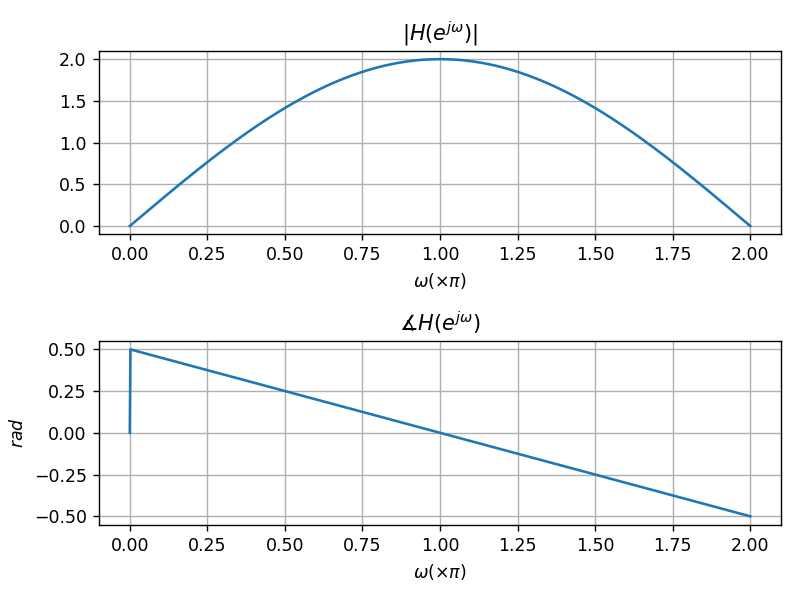

In [9]:
# omega aralığımızı 0-2pi aralığında 1000 nokta olarak tanımlayalım;
w = np.linspace(0,2*pi,1000);

H = 1-exp(-1j*w);          # frekans cevabımızı tanımlayalım.

H_abs = np.abs(H);         # abs komutu ile mutlak değerini alabiliriz,
H_pha = np.angle(H);       # angle komutuyla faz bilgisini alabiliriz.

plt.figure(101);           # yeni figür açtık.
plt.subplot(2, 1, 1);      # subplot ile tek seferde yazdıralım.
plt.plot(w/pi,H_abs);      # omegaya göre genlik çiz.
plt.title('$|H(e^{j\omega})|$'); # genlik için başlık.
plt.xlabel('$\omega (\\times \pi)$');           # x ekseni ismi.
plt.grid();                # gridi aç.
plt.subplot(2, 1, 2);      # subplot ile tek seferde yazdıralım.
plt.plot(w/pi,H_pha/pi);      # omegaya göre faz çiz.
plt.title('$ \measuredangle H(e^{j\omega})$'); # genlik için başlık.
plt.xlabel('$\omega (\\times \pi)$');           # x ekseni ismi.
plt.ylabel('$rad$');          # y ekseni ismi. radyan bırakılmıştır.
plt.grid();                # gridi aç.

plt.show();                # grafiği göster.
plt.tight_layout();        # başlıklar çakışmasın diye.


b) |H(e^jω)|’ya bakarak bu filtrenin nasıl bi karakteristiğe sahip olduğunu
yorumlayın.

Grafiklerden frekans cevabının genliğine bakarsak, band-pass filter yapısında olduğunu söyleyebiliriz.

0 H_fft:  -0j
1 H_fft:  (0.07612046748871326+0.3826834323650898j)
2 H_fft:  (0.2928932188134524+0.7071067811865476j)
3 H_fft:  (0.6173165676349102+0.9238795325112867j)
4 H_fft:  (1+1j)
5 H_fft:  (1.3826834323650898+0.9238795325112867j)
6 H_fft:  (1.7071067811865475+0.7071067811865476j)
7 H_fft:  (1.9238795325112867+0.3826834323650898j)
8 H_fft:  (2-0j)
9 H_fft:  (1.9238795325112867-0.3826834323650898j)
10 H_fft:  (1.7071067811865475-0.7071067811865476j)
11 H_fft:  (1.3826834323650898-0.9238795325112867j)
12 H_fft:  (1-1j)
13 H_fft:  (0.6173165676349102-0.9238795325112867j)
14 H_fft:  (0.2928932188134524-0.7071067811865476j)
15 H_fft:  (0.07612046748871326-0.3826834323650898j)


<IPython.core.display.Javascript object>


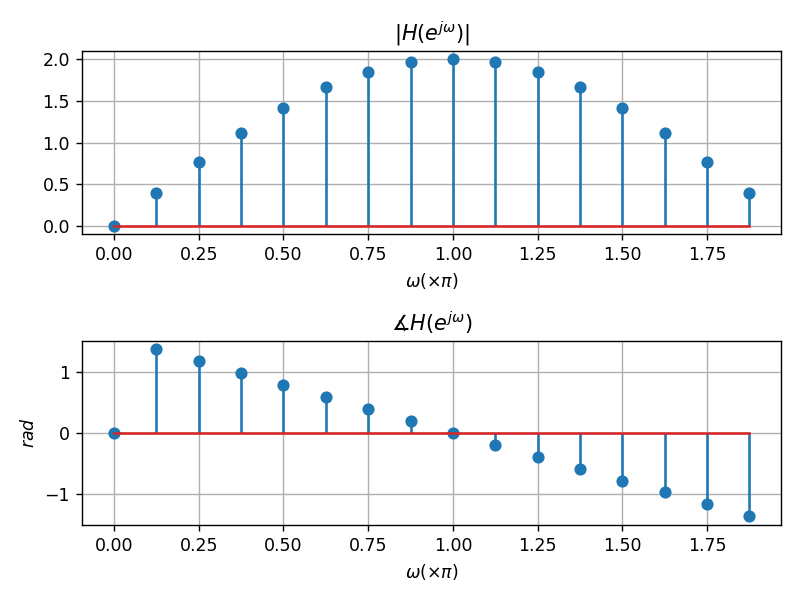

In [3]:
# c) ℎ[𝑛] işaretini 𝑛 = 0, … ,15 indislerinde tanımlı 16 noktalı olacak şekilde
#    oluşturun. Oluşturduğunuz bu dizinin fft() fonksiyonu ile 16 noktalı
#    DFT’sini hesaplayıp genlik ve faz grafiklerini çizdirin.


h=np.array([1,-1]);              # dürtü cevabımızı hesapladık.
#n=np.arange(0,16,1);            # 16 noktalı n domaini oluşturduk.
N=16;
w_16=np.arange(0,N)*(2*pi/N);    # 16 noktalı omegamızı oluşturduk.
H_fft=fft(h,N);                  # 16 noktada fft ile DFT hesapladık.

for i in range(len(w_16)):
    print(i,'H_fft: ',H_fft[i]); # hesapladığımız değerleri yazdırdık.
    
H_abs_fft=np.abs(H_fft);    # hesapladığımız DFT'nin genliğini aldık,
H_pha_fft=np.angle(H_fft);  # aynı şekilde faz bilgisini aldık.

plt.figure(103);            # yeni figür açtık.
plt.subplot(2, 1, 1);       # subplot ile tek seferde yazdıralım.
plt.stem(w_16/pi,H_abs_fft);      # n'e göre 16 noktada genlik çizdirdik.
plt.title('$|H(e^{j\omega})|$'); # genlik için başlık.
plt.xlabel('$\omega (\\times \pi)$');          # x ekseni ismi.
plt.grid();                 # gridi aç.
plt.subplot(2, 1, 2);       # subplot ile tek seferde yazdıralım.
plt.stem(w_16/pi,H_pha_fft);      # n'e göre 16 noktada faz çizdirdik.
plt.title('$ \measuredangle H(e^{j\omega})$'); # genlik için başlık.
plt.xlabel('$\omega (\\times \pi)$');          # x ekseni ismi.
plt.ylabel('$rad$');          # y ekseni ismi. radyan bırakılmıştır.
plt.grid();                 # gridi aç.

plt.show();                 # grafiği göster.
plt.tight_layout();         # başlıklar çakışmasın diye.


### Soru_2
Aşağıdaki dizi 𝐴𝑐𝑜𝑠(𝜔0n + 𝜙) formatında olan sinüzoidal
işaretin tam bir periyot 𝑛 = 0,1, … 7’ye kadar aldığı değerlere karşılık
gelmektedir.

[0, 0.707106, −1, 0.707106, 0, −0.707106, 1, −0.707106]

Bu dizinin DFT’sinin genlik ve faz grafiklerine bakarak 𝐴, 𝜔0 ve 𝜙
değerlerini bulunuz.

<IPython.core.display.Javascript object>


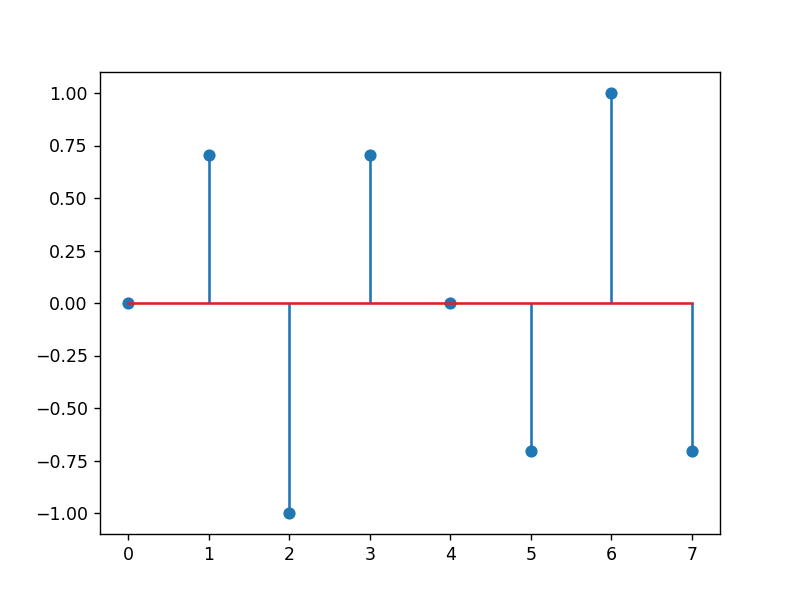

In [4]:
x = np.array([0, 0.707106, -1, 0.707106, 0, -0.707106, 1, -0.707106]);
# işaretimizi tanımlayıp çıktısına göstel olarak bakalım.
plt.figure(200);            # yeni figür açtık.
plt.stem(x);
plt.show();

Bu dizimizi DFT sentez denklemini kullanıp sentezlememiz gerekmektedir.

<IPython.core.display.Javascript object>


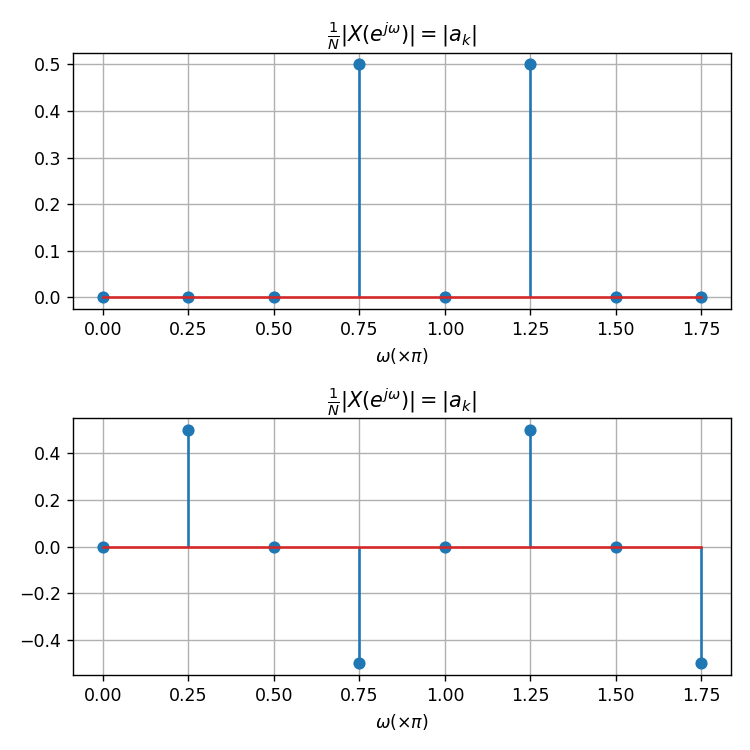

In [5]:
x = np.array([0, 0.707106, -1, 0.707106, 0, -0.707106, 1, -0.707106]);
# işaretimizi tekrar tanımlayalım.
N = len(x);
n = np.arange(0,8);          # n domainini 0,1,...,7 aralığında açalım.
w_discrete = n*2*np.pi/N;    # 0-2pi arasında(2pi noktası dahil değil) 2pi/8 adımlı...
X_abs = np.abs(fft(x)/N);    # X'in fourierini + genliğini aldık.
X_pha = np.angle(fft(x)/N)   # X'in fourierini + fazını aldık.

plt.figure(201,figsize=(6,6));            # yeni figür açtık.
plt.subplot(2, 1, 1);       # subplot ile tek seferde yazdıralım.
plt.stem(w_discrete/pi,X_abs);      # n'e göre 8 noktada genlik çizdirdik.
plt.title('$\\frac{1}{N}|X(e^{j\omega})|=|a_{k}|$');  # genlik için başlık.
plt.xlabel('$\omega (\\times \pi)$');          # x ekseni ismi.
plt.grid();                 # gridi aç.

plt.subplot(2, 1, 2);       # subplot ile tek seferde yazdıralım.
plt.stem(w_discrete/pi,X_pha/pi);      # n'e göre 16 noktada genlik çizdirdik.
plt.title('$\\frac{1}{N}|X(e^{j\omega})|=|a_{k}|$'); # genlik için başlık.
plt.xlabel('$\omega (\\times \pi)$');          # x ekseni ismi.
plt.grid();                 # gridi aç.

plt.show();                 # grafiği göster.
plt.tight_layout();         # başlıklar çakışmasın diye.

Föyde anlatılan metodolojiye göre grafikleri incelediğimizde;
Genlik grafiğinden sadece 3.indisteki 0.75𝜋 ve 5. indisteki 1.25𝜋 frekanslarında DFS katsayılarının sıfırdan farklı değere eşit olduğunu görüyoruz.

Bu nedenle DFS sentez denklemini kullanarak x[𝑛]’i sentezlemek istersek sadece;
|𝑎3|𝑒^𝑗0.75𝜋𝑛 ve |𝑎5|^𝑒𝑗1.25𝜋𝑛 kompleks üstel işaretlerini toplamamız gerekir.

Ön çalışmada örnek olarak yapılan işlemleri yaparsak;
𝑎3=|𝑎3|𝑒^𝑗∠𝑎3=0,5𝑒^−𝑗𝜋2 
𝑎5=|𝑎5|𝑒^𝑗∠𝑎5=0,5𝑒^𝑗𝜋2 olarak buşunur.

 Sonuc olarak işaretimiz;
x[n] = 1*cos(3𝜋𝑛/4−𝜋/2) bulunur. Aradığımız değerlerin burada; 𝐴=1 𝜔=3𝜋/4 𝜙=-𝜋/2 olduğu görülür.

### Soru_3
𝑥[𝑛] = 𝑐𝑜𝑠(pi/3*𝑛) işareti dürtü cevabı ℎ[𝑛] = 𝛿[𝑛]−𝛿[𝑛 −1] olan bir sisteme giriş olarak verildiğinde sistemin çıkışında elde edilen işareti 𝑛 = 0,1,2, … ,10 aralığında çizdiriniz.

H(pi/3) genlik:  0.9999999999999999
H(pi/3)    faz:  1.0471975511965979


<IPython.core.display.Javascript object>


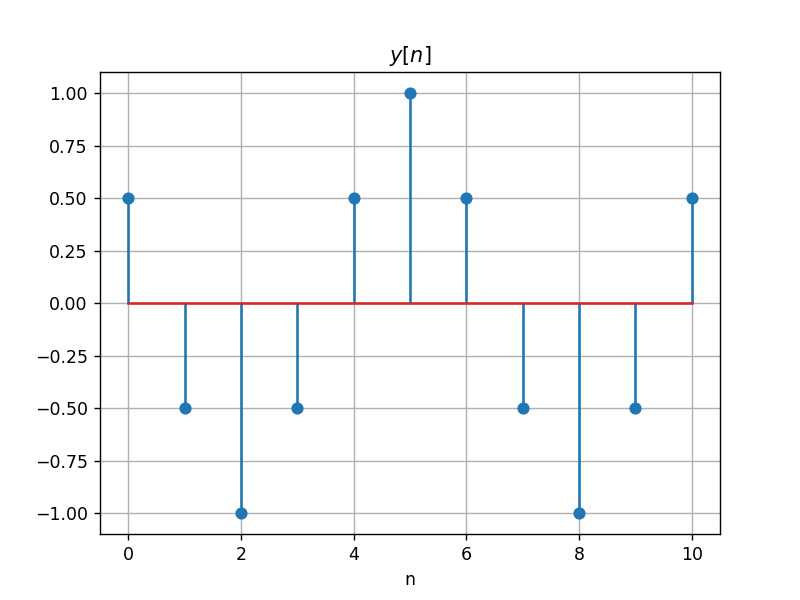

[0.49999999999999983, -0.5000000000000001, -0.9999999999999999, -0.49999999999999956, 0.4999999999999993, 0.9999999999999999, 0.49999999999999967, -0.49999999999999917, -0.9999999999999999, -0.4999999999999998, 0.49999999999999906]


In [8]:
n = np.arange(0,11);
x = cos(pi/3*n);
y_ = [];
# 1. soruda frekans cevabını H = 1-exp(-1j*w); bulmuştuk.
# frekans cevabını w=pi/3 için tekrar tanımlayalım;
w = pi/3;
H = 1-exp(-1j*w);
H_abs = np.abs(H);
H_pha = np.angle(H);
# frekans cevabının faz ve genlik değerlerini yazdıralım.
print('H(pi/3) genlik: ', H_abs);       # H genlik:  0.9999999999999999
print('H(pi/3)    faz: ', H_pha);          # H faz:  1.0471975511965979

# y[n] işaretini oluşturalım;
for i in range(len(n)):
    y = H_abs*cos((pi/3)*i + H_pha);
    y_.append(y);

# x işaretimiz öz fonksiyon olduğundan çıkışı kolaylıkla hesaplayabildik.

plt.figure(301);            # yeni figür açtık.
plt.stem(n,y_);      # n'e göre 16 noktada genlik çizdirdik.
plt.title('$y[n]$'); # genlik için başlık.
plt.xlabel('n');          # x ekseni ismi.
plt.grid();                 # gridi aç

plt.show();                 # grafiği göster.

print(y_);

## Ödev Sonu